<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 3:</span> Feature Engineering</h1>
<hr>

After cleaning the dataset, the next step is to engineer features that can help our predictive models. 

<br>
> *<span style="color:tomato;font-weight:bold">Feature engineering</span> is the practice of creating new features from existing ones.*
* The engineered features are often more specific or isolate key information.

<br>
Often, feature engineering is one of the most valuable tasks a data scientist can do to improve model effectiveness.

This is not an exhaustive list of all types of feature engineering. There are  limitless possibilities for this step, and it's a skill that will naturally improve as you gain more experience and domain expertise. However, you can use this checklist as a reliable starting point!



<br><hr id="toc">

### In this module...

We'll load our cleaned dataset and then cover these steps: 

1. [Start with domain knowledge](#domain)
2. [Create interaction features](#interaction)
3. [Group sparse classes](#group)
4. [Encode dummy variables](#dummy)
5. [Remove unused or redundant features](#remove)

Finally, we'll save the augmented dataframe (analytical base table) to a new file so we can use it for modeling.

<br><hr>

### First, let's import libraries and load the cleaned dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

Before we do anything else, let's import the <code style="color:steelblue">print()</code> function from the future to ensure our code is compatible with Python 3.

In [58]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import the libraries we'll need for this module.

In [59]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

Next, let's import the **cleaned** dataset that we created in the previous module.

In [60]:
# Load cleaned dataset from Module 2
df = pd.read_csv('cleaned_df.csv')

Now, let's display the first 5 rows from the dataset, just so we can have all of the existing features in front of us.

In [61]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


<br id="domain">
# 1. Start with domain knowledge

You can often engineer informative features by tapping into your (or others') expertise about the domain.

<br>
Create an indicator variable to flag properties with 2 beds and 2 baths and name it <code style="color:steelblue">'two_and_two'</code>.

In [62]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

Display the proportion of our observations that have 2 beds and 2 baths.

In [63]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.094580233793836344

Next, let's engineer an indicator feature for the housing market recession.


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 3.1</span>

**Create a new feature called <code style="color:steelblue">'during_recession'</code> to indicate if a transaction falls between 2010 and 2013.**
1. Create a boolean mask to check if <code style="color:steelblue">tx_year >= 2010</code>
2. Create a boolean mask to check if <code style="color:steelblue">tx_year <= 2013</code>
3. Combine the two masks with an <code style="color:steelblue">&</code> operator
4. Convert the resulting series to type <code style="color:steelblue">int</code> to map from <code style="color:crimson">True/False</code> to <code style="color:crimson">1/0</code>

In [64]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

**What proportion of transactions in our dataset were during the recession?**

In [65]:
# Print percent of transactions where during_recession == 1
df.during_recession.mean()

0.26354941551540911

In the case where we're checking to see if a value falls between two numbers, there's a shortcut:

<pre style="color:steelblue">df.tx_year<strong>.between(2010, 2013)</strong>.astype(int)</pre>

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.

<br>
**Confirm that the "between" indicator feature is equivalent to the one you created earlier.**
* Set the earlier feature to a variable named <code style="color:steelblue">a</code>
* Set this new feature to a variable named <code style="color:steelblue">b</code>
* Confirm they are equivalent with <code style="color:steelblue">all(a == b)</code>, which checks to see if every element in <code style="color:steelblue">a</code> is equal to the corresponding element in <code style="color:steelblue">b</code>

In [66]:
# Set variable a as the earlier indicator variable (combining two masks)
a = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df.tx_year.between(2010, 2013).astype(int)

# Are a and b equivalent?
all(a==b)

True

One useful tip is that you can overwrite columns in Pandas DataFrames.
* You don't need to reload the DataFrame before doing so.
* Since these two statements are equivalent, it doesn't matter which we use.

<br>
**Overwrite the <code style="color:steelblue">'during_recession'</code> feature you created at the beginning of the exercise with the new indicator feature created by <code style="color:steelblue">.between()</code>.**

In [67]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df.during_recession = df.tx_year.between(2010, 2013).astype(int)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="interaction">
# 2. Create interaction features

Next, we have a few specific **heuristics** that can help spark more ideas.

<br>
Create <code style="color:steelblue">'property_age'</code> feature for the age of the property at the time of the transaction.

In [68]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

Do a quick sanity check. Print the minimum <code style="color:steelblue">'property_age'</code>.

In [69]:
# Should not be less than 0
df.property_age.min()

-8

Print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.

In [70]:
# Number of observations with 'property_age' < 0
sum(df.property_age < 0)

19

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">

## <span style="color:RoyalBlue">Exercise 3.2<span>

**Remove observations where <code style="color:steelblue">'property_age'</code> is less than 0.**
* **Tip:** You can use a boolean mask to keep only observations where <code style="color:steelblue">'property_age'</code> is at least 0.
* Overwrite the existing <code style="color:steelblue">df</code>.
* Print the length of the new DataFrame.

In [71]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
len(df)

1863

Now, let's add another interaction feature. How about the number of quality schools nearby?

* Well, we do know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_schools'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?

We can represent this with an interaction feature.

<br>
**Create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_schools'</code>.**

In [72]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school



**Finally, display the median <code style="color:steelblue">'school_score'</code> from the dataset.**

In [73]:
# Display median school score
df.school_score.median()

18.0

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="group">
# 3. Group sparse classes

The next heuristic we'll consider is grouping sparse classes in our categorical features. 

<br>
Let's begin by plotting the bar plots for <code style="color:steelblue">'exterior_walls'</code> again.

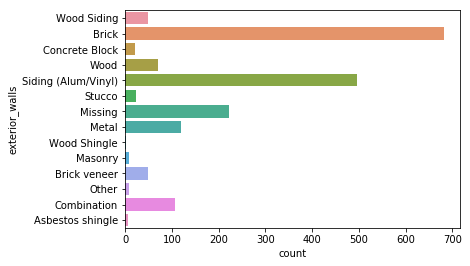

In [74]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

Group <code style="color:crimson">'Wood Siding'</code>, <code style="color:crimson">'Wood Shingle'</code>, and <code style="color:crimson">'Wood'</code> together. Label all of them as <code style="color:crimson">'Wood'</code>.

In [75]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

Next, let's label <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, and <code style="color:crimson">'Masonry'</code> as <code style="color:crimson;">'Other'</code>:

In [76]:
# List of classes to group
other_exterior_walls = ['Stucco','Other','Asbestos shingle','Concrete Block','Masonry']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

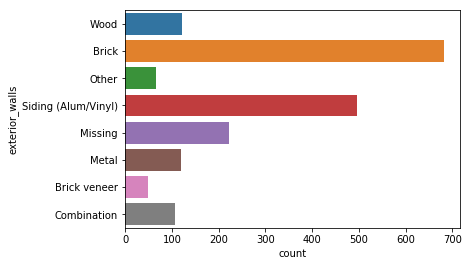

In [77]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 3.3</span>

**First, display the bar plot for <code style="color:steelblue">'roof'</code>.**

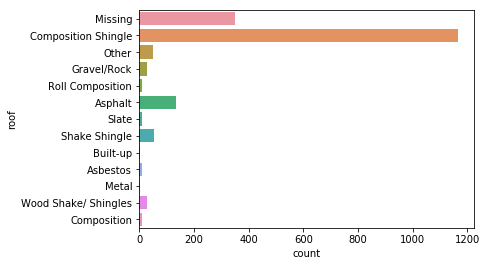

In [86]:
# Bar plot for roof
sns.countplot(y='roof', data=df)

As with the <code style="color:steelblue">'exterior_walls'</code> feature above, we can start by grouping classes that are quite similar. 

<br>
**Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.**
* Remember to perform the replacing with <code style="color:steelblue">inplace=True</code>

In [94]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition','Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

Next, let's group remaining sparse classes into a single <code style="color:crimson">'Other'</code> class.

<br>
**Label <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> as <code style="color:crimson">'Other'</code>.**

In [95]:
# List of classes to group
other_roof = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roof, 'Other', inplace=True)

**Finally, display bar plot again.**

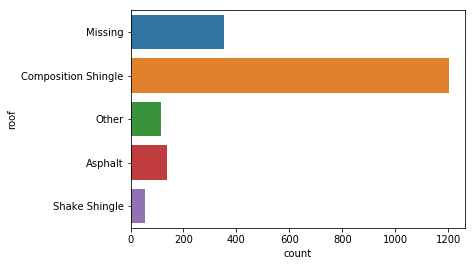

In [97]:
# Bar plot for roof
sns.countplot(y='roof', data=df)

Much nicer!

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>



<br id="dummy">
# 4. Encode dummy variables

Python machine learning algorithms cannot handle categorical features directly. 

<br>
Create a new dataframe with dummy variables for for our categorical features.

In [98]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

Display the first 5 rows of your dataframe to see these new features.

In [103]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="remove">
# 5. Remove unused or redundant features

Finally, let's remove unused for redundant features from our dataset.

<br>
Drop <code style="color:steelblue">'tx_year'</code> and <code style="color:steelblue">'year_built'</code> from your dataset.

In [104]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)

Save the analytical base table.

In [105]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

### Final tip

Not all of the features you engineer need to be winners. 
* In fact, you'll often find that many of them do not add much value to your model. 
* That's OK. 
* One highly predictive feature makes up for 10 duds.

The key is choosing machine learning algorithms that can effectively select the best features among many options (**built-in feature selection**). This will allow you to avoid overfitting your model despite providing many input features. We'll cover this in the next module!


<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br>
## Next Steps

Congratulations for making through Project 2's Feature Engineering module!

As a reminder, here are a few things you did in this module:
* You made several indicator features from domain knowledge.
* You created the interaction feature <code style="color:steelblue">'property_age'</code>.
* You grouped sparse classes in the <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features.
* And you encoded dummy variables and saved the final analytical base table.

In the next module, <span style="color:royalblue">Module 4: Regression Algorithms</span>, we'll walk through intuition behind 5 of the most popular (and effective) machine learning algorithms for regression tasks.

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>